In [1]:
import numpy as np
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

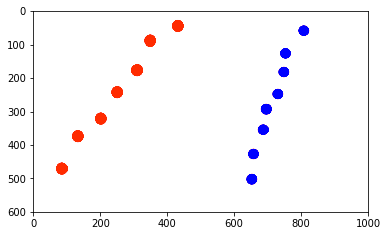

In [2]:
img = cv2.imread('cone_birdseye.png')
img2 = img.copy()

plt.imshow(img,cmap='gray')
plt.show()

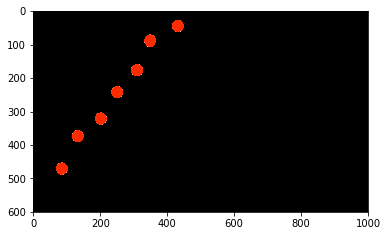

In [3]:
lower_red = np.array([255,40,0])
upper_red = np.array([255,255,180])

mask_red = cv2.inRange(img, lower_red, upper_red)
res_red = cv2.bitwise_and(img,img, mask= mask_red)

plt.imshow(res_red)
plt.show()

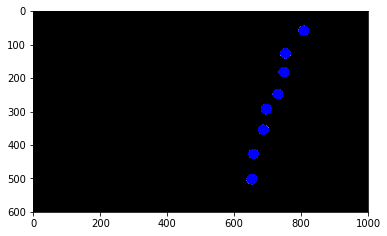

In [4]:
lower_blue= np.array([0,0,0])
upper_blue = np.array([138,255,255])

mask_blue = cv2.inRange(img, lower_blue, upper_blue)
res_blue = cv2.bitwise_and(img,img, mask= mask_blue)

plt.imshow(res_blue)
plt.show()

[[[ 687.5         350.5          18.10000038]
  [ 730.5         244.5          18.10000038]
  [ 748.5         178.5          18.10000038]
  [ 753.5         122.5          18.10000038]
  [ 808.5          55.5          18.10000038]
  [ 653.5         504.5          18.10000038]
  [ 658.5         429.5          18.10000038]
  [ 696.5         295.5          18.10000038]]]


Text(0.5, 1.0, 'Blue Cones')

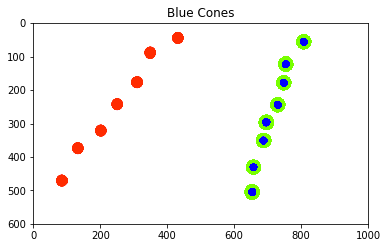

In [5]:
gray_blue = cv2.cvtColor(res_blue, cv2.COLOR_BGR2GRAY) 

circles_blue = cv2.HoughCircles(gray_blue, cv2.HOUGH_GRADIENT, 1, 20,
              param1=30,
              param2=15,
              minRadius=0,
              maxRadius=0)

print (circles_blue)
circles_blue = np.uint16(np.around(circles_blue))
for i in circles_blue[0,:]:
    cv2.circle(img,(i[0],i[1]),i[2],(120,255,0),10)
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(img)
plt.title('Blue Cones')

[[[  86.5         470.5          18.29999924]
  [ 133.5         373.5          18.29999924]
  [ 202.5         320.5          18.29999924]
  [ 251.5         242.5          18.29999924]
  [ 310.5         176.5          18.29999924]
  [ 349.5          88.5          18.29999924]
  [ 432.5          44.5          18.29999924]]]


Text(0.5, 1.0, 'Red Cones')

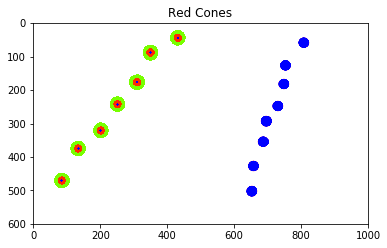

In [6]:
gray_red = cv2.cvtColor(res_red, cv2.COLOR_BGR2GRAY) 

circles_red = cv2.HoughCircles(gray_red, cv2.HOUGH_GRADIENT, 1, 20,
              param1=32,
              param2=14,
              minRadius=0,
              maxRadius=0)

print (circles_red)
circles_red = np.uint16(np.around(circles_red))
for i in circles_red[0,:]:
    cv2.circle(img2,(i[0],i[1]),i[2],(120,255,0),10)
    cv2.circle(img2,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(img2)
plt.title('Red Cones')

# 

[86, 134, 202, 252, 310, 350, 432]
[470, 374, 320, 242, 176, 88, 44]
[  7.18946352e-04  -1.61947976e+00   5.98492622e+02]


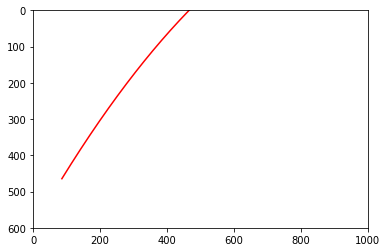

In [7]:
x = [point[0] for point in circles_red[0,:]]
y = [point[1] for point in circles_red[0,:]]
print (x)
print (y)

z = np.polyfit(x, y, 2)

print(z)

f = np.poly1d(z)
t = np.arange(86, 470, 1)

ax2 = plt.subplot()
ax2.axis([0, 1000, 600, 0])
ax2.plot(t, f(t),'r')
lineThickness = 2


plt.show()

[688, 730, 748, 754, 808, 654, 658, 696]
[350, 244, 178, 122, 56, 504, 430, 296]
[  9.26493782e-03  -1.62791657e+01   7.15906199e+03]


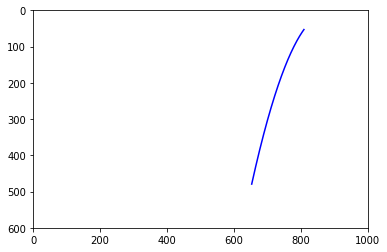

In [8]:
x2 = [point[0] for point in circles_blue[0,:]]
y2 = [point[1] for point in circles_blue[0,:]]
print (x2)
print (y2)

z2 = np.polyfit(x2, y2, 2)

print(z2)

f2 = np.poly1d(z2)
t2 = np.arange(653, 810, 1)

ax3 = plt.subplot()
ax3.axis([0, 1000, 600, 0])
ax3.plot(t2, f2(t2), 'b')
lineThickness = 2

plt.show()

In [17]:
img_height = img.shape[0]
y_eval = img_height
ym_per_pix = 30 / 720 # test value 1
xm_per_pix = 3.7 / 700 # test value 2

left_curverad = ((1 + (2 * z[0] * y_eval * ym_per_pix + z[1]) ** 2) ** 1.5) / np.absolute(
    2 * z[0])

right_curverad = (
                     (1 + (2 * z2[0] * y_eval * ym_per_pix + z2[1]) ** 2) ** 1.5) / np.absolute(
    2 * z2[0])

radius = round((float(left_curverad) + float(right_curverad))/2.,2)

print(radius)

109678.27


In [41]:
left_fit  = z
right_fit = z2
lane_width = (right_fit[2] - left_fit[2]) * xm_per_pix
center = (right_fit[2] - left_fit[2]) / 2
off_left = (center - left_fit[2]) * xm_per_pix
off_right = -(right_fit[2] - center) * xm_per_pix
off_center = round((center - img.shape[0] / 2.) * xm_per_pix,2)


# --- Print text on screen ------ #
#if radius < 5000.0:str(
cv2.circle(img,center[0], 55, (0,255,0), -1)
print(str(radius), str(off_center))


IndexError: invalid index to scalar variable.